# Projet Vinasse
## Introduction
Ce notebook a pour objectif de vous présenter notre analyse de données sur des datasets liés au vin.
L'objectif principal de ce projet est donc de réaliser une analyse exploratoire des données. Ce notebook présente chaque étape du processus, tout en fournissant des visualisations détaillées pour faciliter la compréhension des résultats.

## Jeux de données
Afin de réaliser cette analyse, nous avons sélectionné différents datasets :

### winemag.csv

"winemag.csv" qui provient de Kaggle (https://www.kaggle.com/datasets/mysarahmadbhat/wine-tasting).
Ce fichier CSV contient les prix et les notations de nombreux vins à travers le monde.

INFORMATION SUR LES COLONNES :
- **country** : Le pays où le vin est produit
- **description** : Une description du vin
- **designation** : Le nom du vignoble où le raisin qui a fait le vin a été récolté
- **points** : La note donnée au vin par le dégustateur
- **price** : Le prix du vin
- **province** : La région ou l'état où le vin est produit
- **region_1** : La région viticole dans laquelle le vin est produite
- **region_2** : Une région plus spécifique
- **taster_name** : Le nom du dégustateur
- **taster_twitter_handle** : Le compte Twitter du dégustateur
- **title** : Le titre du vin
- **variety** : Le type de raisin utilisé pour produire le vin
- **winery** : Le nom du producteur de vin

### wine-production.csv

"wine-production.csv" qui provient de *"Food and Agriculture Organization of the United Nations (2023)" – avec un traitement majeur par Our World in Data*.
Ce fichier CSV contient les productions de vin par année dans différentes régions.

INFORMATION SUR LES COLONNES :
- **Area** : La région où le vin est produit    
- **Year** : L'année de production
- **Value** : La quantité de vin produite

## Structure du notebook 

[Installation des prérequis](#INSTALLATION-DES-PREREQUIS)

[Nettoyage des données](#NETTOYAGE-DES-DONNEES)  

[Analyse des données](#ANALYSE-DES-DONNEES) 

[Modélisation](#MODELISATION)  

[Conclusion](#CONCLUSION)

# INSTALLATION DES PREREQUIS

In [3]:
%pip install -r requirements.txt

   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.7 MB 13.7 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.7 MB 14.1 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.7 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 9.7/9.7 MB 14.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/731.2 kB ? eta -:--:--
   --------------------------------------- 731.2/731.2 kB 14.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---- ----------------------------------- 3.1/25.3 MB 16.9 MB/s eta 0:00:02
   --------- ------------------------------ 6.3/25.3 MB 16.8 MB/s eta 0:00:02
   ------------ --------------------------- 7.9/25.3 MB 13.9 MB/s eta 0:00:02
   ----------------- ---------------------- 10.7/25.3 MB 13.4 MB/s eta 0:00:02
   ------------------- -------------------- 12.3/25.3 MB 12.9 MB/s eta 0:00:02
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NETTOYAGE DES DONNEES


## nettoyage de "winemag.csv"

In [5]:
%matplotlib inline
file_path = "data/winemag.csv"  # Modifier avec le chemin correct
df = pd.read_csv(file_path)

In [6]:
df.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [8]:
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)
df = df.dropna(subset=["country"])
missing_values = df.isnull().sum()
print("Valeurs manquantes par colonne après suppression :\n", missing_values)



Valeurs manquantes par colonne :
 id                           0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64
Valeurs manquantes par colonne après suppression :
 id                           0
country                      0
description                  0
designation              37454
points                       0
price                     8992
province                     0
region_1                 21184
region_2                 79397
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


In [9]:
df.describe()

,id,points,price
count,129908.000000,129908.000000,120916.000000
mean,64984.451889,88.447047,35.368644
std,37518.786765,3.040066,41.031052
min,0.000000,80.000000,4.000000
25%,32491.750000,86.000000,17.000000
50%,64985.500000,88.000000,25.000000
75%,97475.250000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [10]:
duplicates = df.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


## Nettoyage de "wine-prodution"


In [11]:
file_path = "data/wine-production/wine-production.csv"  # Modifier avec le chemin correct
df_prod = pd.read_csv(file_path)

In [12]:
df_prod.head()

,Entity,Code,Year,Wine
0,Africa,NaN,1961,2041926.0
1,Africa,NaN,1962,2232189.0
2,Africa,NaN,1963,2070770.0
3,Africa,NaN,1964,1856545.0
4,Africa,NaN,1965,2389869.0


In [13]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Entity  5969 non-null   object 
 1   Code    3765 non-null   object 
 2   Year    5969 non-null   int64  
 3   Wine    5969 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 186.7+ KB


In [14]:
missing_values = df_prod.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_values)

Valeurs manquantes par colonne :
 Entity       0
Code      2204
Year         0
Wine         0
dtype: int64


In [15]:
duplicates = df_prod.duplicated().sum()
print(f"Nombre de doublons : {duplicates}")

Nombre de doublons : 0


# ANALYSE DES DONNEES 

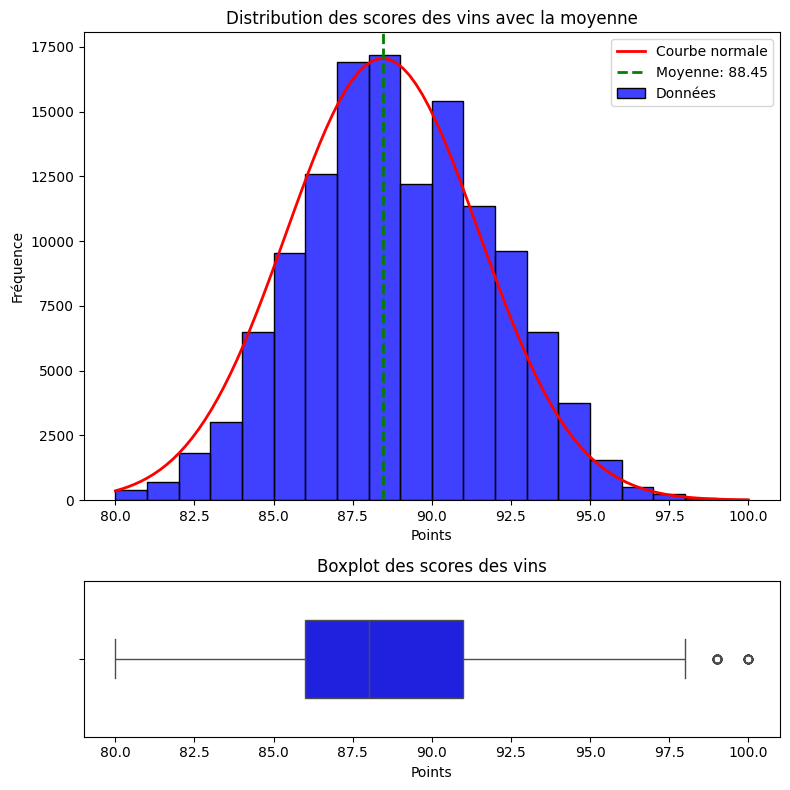

In [16]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la moyenne et de l'écart-type
mean = df["points"].mean()
std = df["points"].std()

# Générer les valeurs pour la courbe normale
x = np.linspace(df["points"].min(), df["points"].max(), 100)
normal_curve = norm.pdf(x, mean, std) * len(df["points"]) * (df["points"].max() - df["points"].min()) / 20  # Adapter à l'échelle de l'histogramme

# Créer une figure avec deux sous-graphiques : un pour l'histogramme et un pour la boîte à moustaches
fig, ax = plt.subplots(2, 1, figsize=(8, 8), gridspec_kw={"height_ratios": [3, 1]})

# Tracer l'histogramme avec la courbe normale sur le premier graphique
sns.histplot(df["points"], bins=20, kde=False, color="blue", label="Données", ax=ax[0])
ax[0].plot(x, normal_curve, color="red", label="Courbe normale", linewidth=2)
ax[0].axvline(mean, color="green", linestyle="--", linewidth=2, label=f"Moyenne: {mean:.2f}")
ax[0].set_title("Distribution des scores des vins avec la moyenne")
ax[0].set_xlabel("Points")
ax[0].set_ylabel("Fréquence")
ax[0].legend()

# Tracer la boîte à moustaches sur le deuxième graphique
sns.boxplot(x=df["points"], ax=ax[1], color="blue", width=0.5)
ax[1].set_title("Boxplot des scores des vins")
ax[1].set_xlabel("Points")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

Forme de la distribution :

La distribution semble asymétrique à droite (légèrement inclinée), car il y a une concentration plus élevée autour de 87-88, avec une queue qui s'étire vers des scores plus élevés (au-delà de 90).
Cela signifie que la plupart des vins obtiennent des scores moyens (entre 85 et 90), mais il existe quelques vins d'exception avec des scores élevés.

Courbe normale (rouge) :

La courbe normale est superposée pour comparer la distribution réelle avec une distribution théorique normale.
Bien que les données suivent grossièrement une forme normale, elles présentent une légère déviation : la queue droite est plus longue, indiquant une distribution légèrement biaisée.

Moyenne (ligne verte) :

La moyenne des scores est d’environ 88,45 (indiquée dans la légende).
Cela montre que les vins évalués sont majoritairement dans une gamme supérieure de qualité (puisque les scores sont généralement compris entre 80 et 100).
Étalement des données :

L’histogramme montre une variabilité modérée. Les scores sont principalement regroupés autour de la moyenne (entre 85 et 90), mais la queue droite indique qu’il existe des scores plus élevés, probablement attribués à des vins exceptionnels.

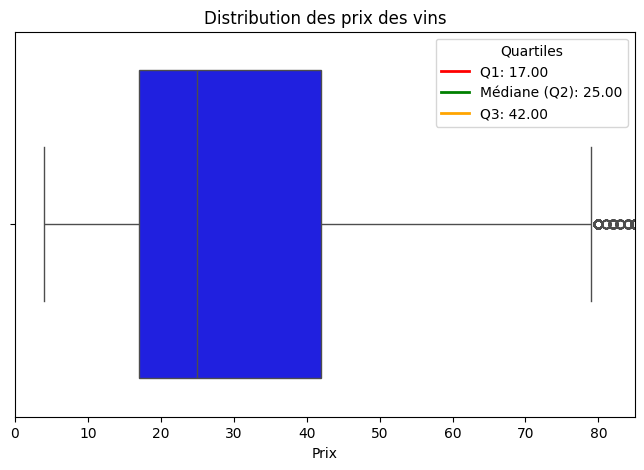

In [17]:
plt.figure(figsize=(8, 5))

# Tracer le boxplot
sns.boxplot(x=df["price"], color="blue")

# Calcul des quartiles
q1 = df["price"].quantile(0.25)
q2 = df["price"].median()  # Équivalent à Q2
q3 = df["price"].quantile(0.75)

# Ajouter la légende
plt.legend(
    handles=[
        plt.Line2D([0], [0], color="red", lw=2, label=f"Q1: {q1:.2f}"),
        plt.Line2D([0], [0], color="green", lw=2, label=f"Médiane (Q2): {q2:.2f}"),
        plt.Line2D([0], [0], color="orange", lw=2, label=f"Q3: {q3:.2f}"),
    ],
    loc="upper right",
    title="Quartiles",
)

# Limite pour exclure les valeurs extrêmes
plt.xlim(0, df["price"].quantile(0.95))

# Ajouter le titre et les labels
plt.title("Distribution des prix des vins")
plt.xlabel("Prix")
plt.show()

Répartition des prix : 
On remarque que la distribution des prix est asymétrique à droite, avec une concentration plus élevée autour de 20-40 USD. La médiane des prix est de 25 USD, ce qui signifie que la moitié des vins coûtent moins de 25 USD.
La moustache étant plus étendue à droite, cela indique qu'il existe des vins plus chers, mais ils sont moins fréquents. Les valeurs extrêmes sont également visibles, avec des prix allant jusqu'à 3300 USD. 

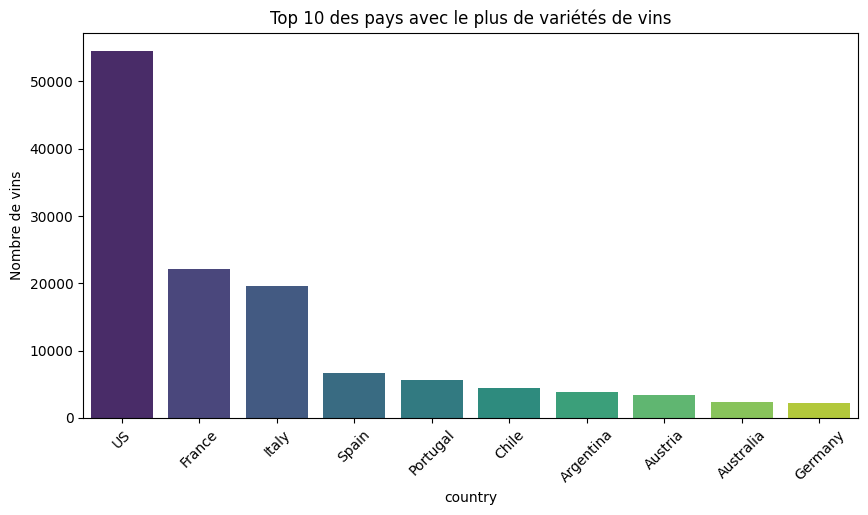

In [18]:
top_countries = df["country"].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis", hue=top_countries.index)
plt.title("Top 10 des pays avec le plus de variétés de vins")
plt.ylabel("Nombre de vins")
plt.xticks(rotation=45)
plt.show()

Le diagramme met en évidence la domination des grandes nations viticoles comme la France, l’Italie, l’Espagne et les États-Unis.

On remarque que les États-Unis sont fortement représentés, ce qui peut indiquer un biais lié aux sources des données, souvent influencées par des critiques anglophones. Cela peut entraîner un déséquilibre dans l’analyse et masquer la diversité des autres pays producteurs.

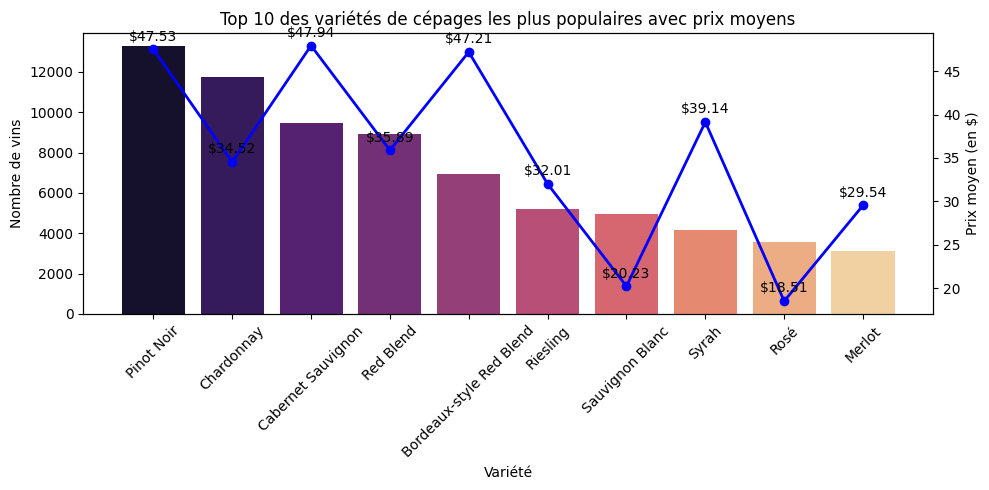

In [19]:
# Calcul des variétés les plus populaires
top_varieties = df["variety"].value_counts().head(10)

# Calcul du prix moyen pour chaque variété
mean_prices = df.groupby("variety")["price"].mean().reindex(top_varieties.index)

# Création du graphique
plt.figure(figsize=(10, 5))

# Graphique en barres des variétés les plus populaires
sns.barplot(x=top_varieties.index, y=top_varieties.values, palette="magma", label="Nombre de vins",hue=top_varieties.index)

# Ajouter une courbe des prix moyens
ax = plt.gca()
ax2 = ax.twinx()  # Deuxième axe pour les prix
ax2.plot(top_varieties.index, mean_prices, color="blue", marker="o", label="Prix moyen", linewidth=2)
# ajoute des lignes horizontales pour les prix moyens
for i, v in enumerate(mean_prices):
    ax2.text(i, v + 1, f"${v:.2f}", color='black', ha='center')
# Configuration des titres et étiquettes
plt.title("Top 10 des variétés de cépages les plus populaires avec prix moyens")
ax.set_ylabel("Nombre de vins")
ax2.set_ylabel("Prix moyen (en $)")
ax.set_xlabel("Variété")
ax.tick_params(axis='x', rotation=45)

# Ajouter une légende pour les deux axes

plt.tight_layout()
plt.show()


Ce diagramme met en évidence les 10 cépages les plus courants dans le dataset. Les variétés en tête, comme le Cabernet Sauvignon, Chardonnay ou Pinot Noir, sont des cépages mondialement connus, largement cultivés et appréciés. Leur popularité peut être due à leur forte production, à la demande du marché ou à leur présence dans les critiques de vin.

Si une ou plusieurs variétés dominent nettement, cela peut indiquer un biais dans la collecte des données, favorisant certaines régions viticoles ou styles de vin. De plus, la forte présence des cépages américains peut refléter la surreprésentation des vins des États-Unis dans le dataset, créant un déséquilibre au détriment de certaines variétés locales d’autres pays. Une analyse plus fine des notes moyennes par cépage permettrait d’évaluer si les variétés les plus populaires sont aussi celles jugées de meilleure qualité.

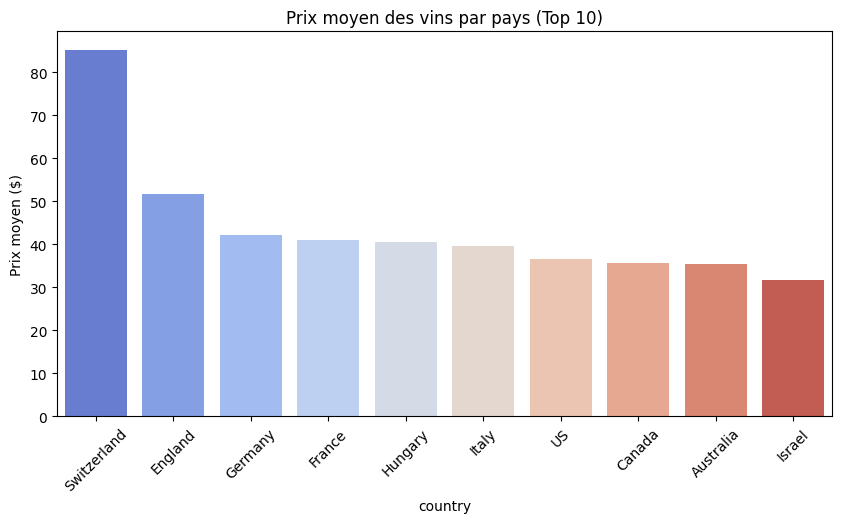

In [20]:
avg_price_country = df.groupby("country")["price"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_price_country.index, y=avg_price_country.values, palette="coolwarm", hue=avg_price_country.index)
plt.title("Prix moyen des vins par pays (Top 10)")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45)
plt.show()

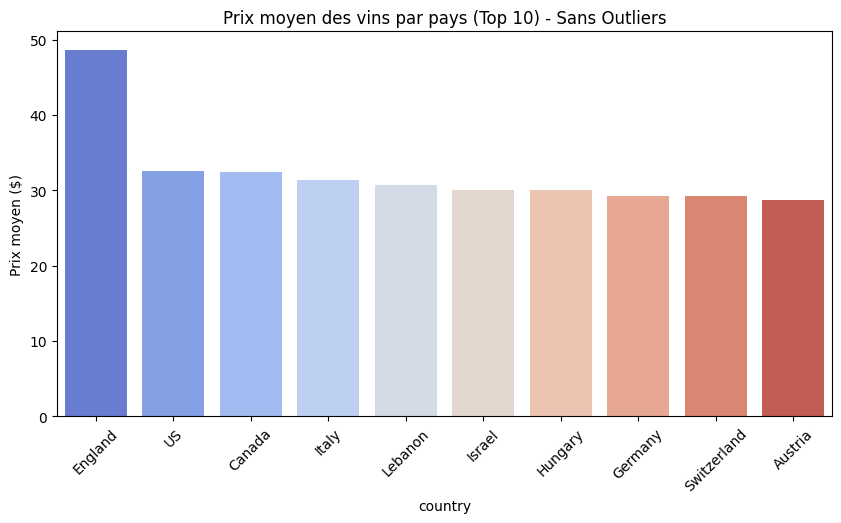

In [21]:
# Détection et suppression des outliers selon le critère de Tukey
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrer les prix sans les outliers
df_no_outliers = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

# Calcul du prix moyen par pays sans outliers
avg_price_country_no_outliers = (
    df_no_outliers.groupby("country")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Création du graphique
plt.figure(figsize=(10, 5))
sns.barplot(
    x=avg_price_country_no_outliers.index,
    y=avg_price_country_no_outliers.values,
    palette="coolwarm",
    hue=avg_price_country_no_outliers.index,
)
plt.title("Prix moyen des vins par pays (Top 10) - Sans Outliers")
plt.ylabel("Prix moyen ($)")
plt.xticks(rotation=45)
plt.show()

Ce diagramme montre les 10 pays avec les vins les plus chers en moyenne. On observe que certains pays affichent des prix moyens nettement plus élevés, ce qui peut être dû à une production limitée, une forte réputation viticole ou une demande premium.

Si un pays se démarque largement en tête, cela suggère soit un marché haut de gamme, soit un biais dans le dataset, où seuls les vins les plus prestigieux sont recensés.

Les États-Unis sont probablement bien représentés, ce qui peut fausser l’analyse en raison d’une surreprésentation des vins américains dans le dataset. Ce déséquilibre pourrait masquer d’autres pays proposant aussi des vins haut de gamme mais en plus faible quantité dans les données. Une analyse croisée avec la distribution des points permettrait de vérifier si ces prix élevés sont corrélés à une meilleure qualité.

Dans le cas de la France, on remarque qu'elle n'est plus présente dans le top 10. Cela s'explique probablement par sa forte production de vin, incluant un grand nombre de vins à prix abordables. Cependant, la France est mondialement reconnue pour la qualité de ses vins, et il est donc logique que certains de ses crus figurent parmi les plus chers. Cela explique pourquoi, lorsque les outliers sont exclus, la France disparaît du top 10, les vins à prix excessivement élevés n'étant plus pris en compte dans l'analyse.

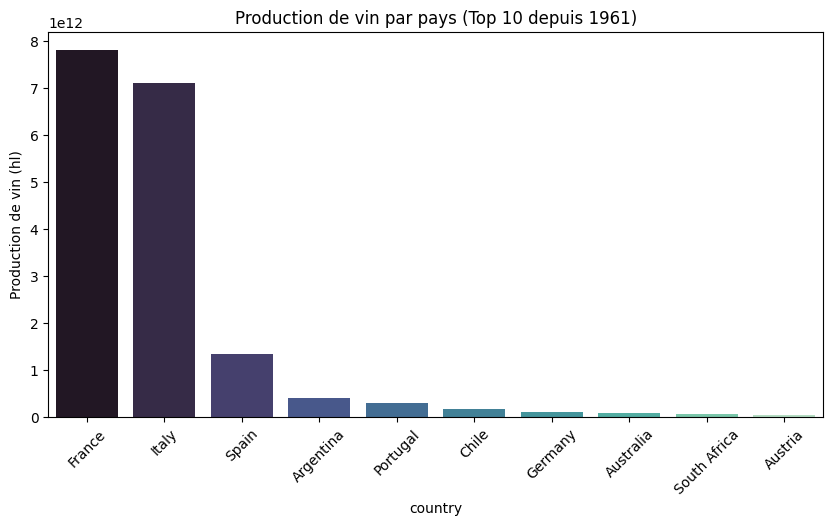

In [22]:
df_merged = pd.merge(df, df_prod, left_on="country", right_on="Entity")
df_merged = df_merged.groupby("country")["Wine"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=df_merged.index, y=df_merged.values, palette="mako", hue=df_merged.index)
plt.title("Production de vin par pays (Top 10 depuis 1961)")
plt.ylabel("Production de vin (hl)")
plt.xticks(rotation=45)
plt.show()

Ici, sans surprise, on peut voir que la france, l'Italy et l'Espagne sont l'argement en tête en terme de production de vin. Cela s'explique par le fait que ces pays sont des pays historiques de production de vin. 

C:\Users\phili\AppData\Local\Temp\ipykernel_29828\2466513409.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = df.groupby(price_bins)["points"].mean()


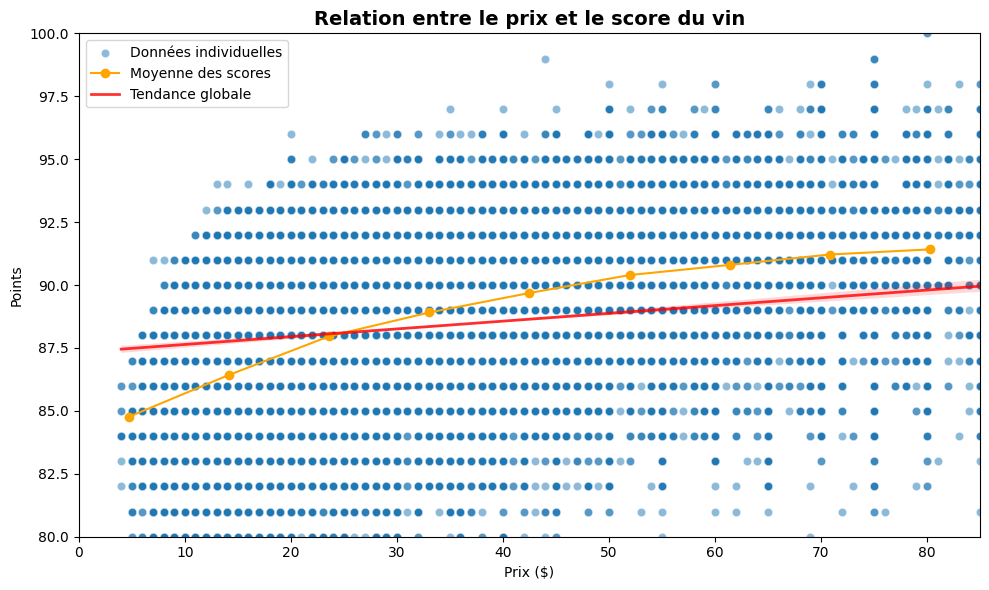

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Créer des tranches de prix pour mieux regrouper les données
price_bins = pd.cut(df["price"], bins=np.linspace(0, df["price"].quantile(0.95), 10), include_lowest=True)
price_bin_centers = price_bins.cat.categories.mid  # Calculer les centres des tranches

# Calculer les moyennes de points pour chaque tranche de prix
mean_scores = df.groupby(price_bins)["points"].mean()

# Créer le graphique
plt.figure(figsize=(10, 6))

# Tracer les points (scatterplot)
sns.scatterplot(x=df["price"], y=df["points"], alpha=0.5, label="Données individuelles")

# Tracer les moyennes (groupées par tranche de prix)
plt.plot(price_bin_centers, mean_scores, marker="o", color="orange", label="Moyenne des scores")

# Ajouter une régression linéaire (courbe de tendance globale)
sns.regplot(x=df["price"], y=df["points"], scatter=False, color="red", line_kws={"linewidth": 2, "alpha": 0.8}, label="Tendance globale")

# Configurer les limites des axes
plt.xlim(0, df["price"].quantile(0.95))  # Exclure les valeurs extrêmes
plt.ylim(80, 100)

# Ajouter un titre et des labels d'axes
plt.title("Relation entre le prix et le score du vin", fontsize=14, fontweight="bold")
plt.xlabel("Prix ($)")
plt.ylabel("Points")

# Ajouter une légende
plt.legend()

# Améliorer la mise en page
plt.tight_layout()
plt.show()

Ici on peut voir la relation entre le vin et le prix. On remarque que pour les vins à bas prix la notation est relativement faible. Plus les prix montes plus la moyenne des prix tend vers une limite. On peut donc en déduire que à partir d'un certain prix la qualité du vin n'est plus vraiment affecté par le prix. 

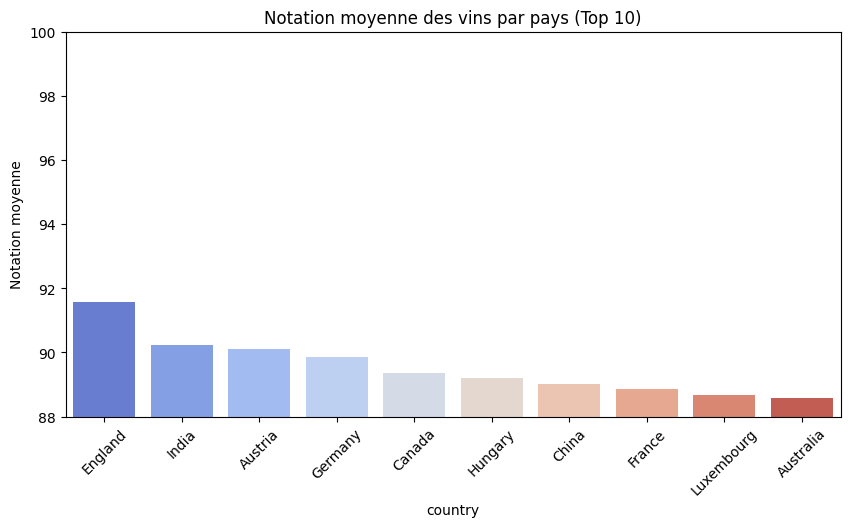

In [24]:
avg_notation_country = df.groupby("country")["points"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.ylim(88, 100)
sns.barplot(x=avg_notation_country.index, y=avg_notation_country.values, palette="coolwarm", hue=avg_notation_country.index)
plt.title("Notation moyenne des vins par pays (Top 10)")
plt.ylabel("Notation moyenne")
plt.xticks(rotation=45)
plt.show()

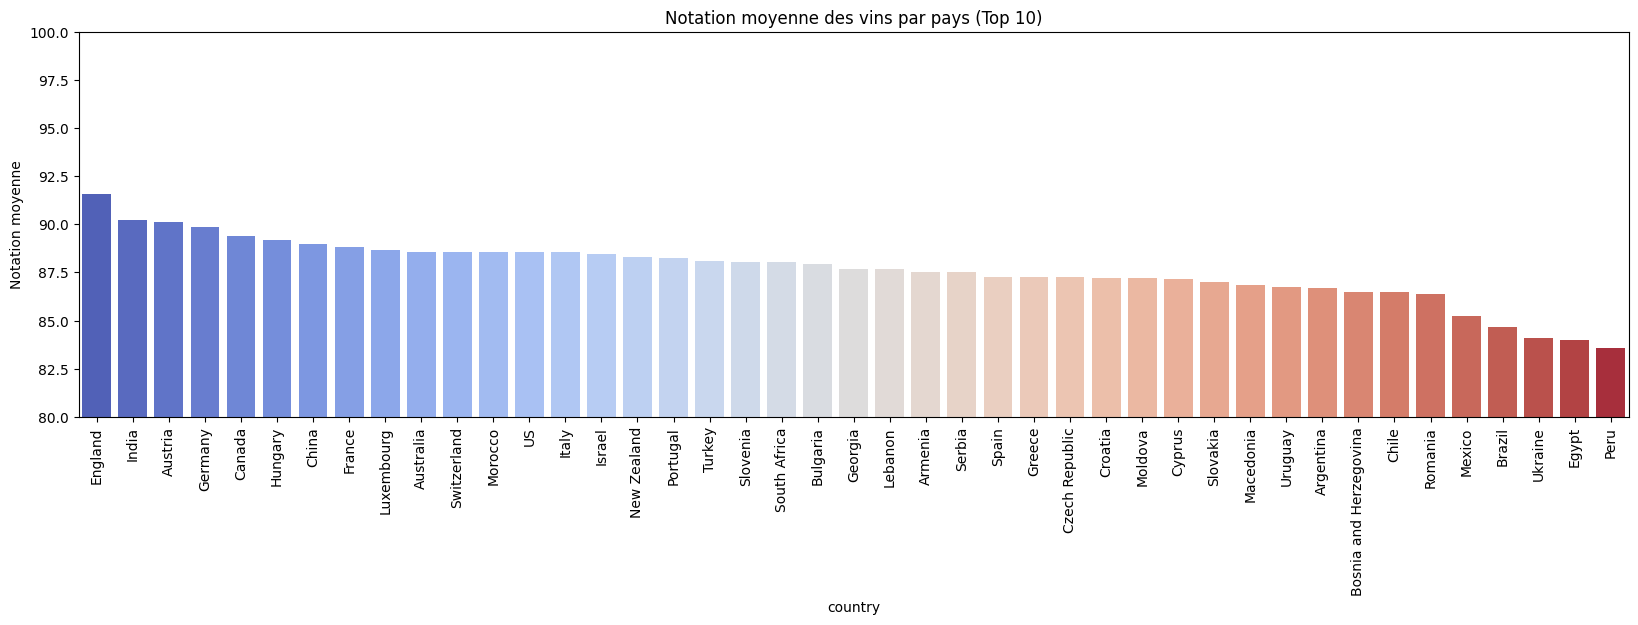

In [25]:
avg_notation_country = df.groupby("country")["points"].mean().sort_values(ascending=False)
plt.figure(figsize=(20,5))
plt.ylim(80, 100)
sns.barplot(x=avg_notation_country.index, y=avg_notation_country.values, palette="coolwarm", hue=avg_notation_country.index)
plt.title("Notation moyenne des vins par pays (Top 10)")
plt.ylabel("Notation moyenne")
plt.xticks(rotation=90)
plt.show()

# Estimation des caractéristique d'un bon vin

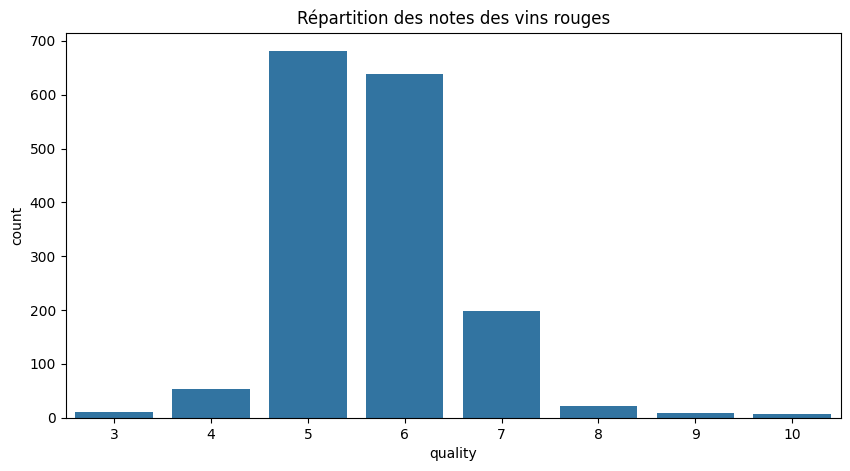

In [26]:
df_quality = pd.read_csv('data/winequality-red.csv')

# afficher la répartition des notes
plt.figure(figsize=(10,5))
sns.countplot(x='quality', data=df_quality)
plt.title('Répartition des notes des vins rouges')
plt.show()


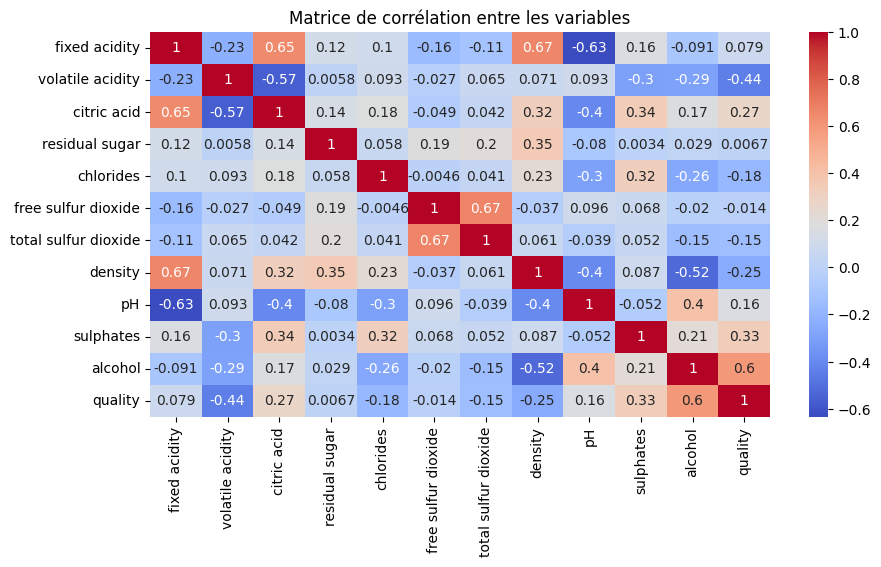

In [27]:
# matrice de corrélation entre la qualité et les autres variables
corr = df_quality.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables')
plt.show()



In [28]:
import statsmodels.api as sm

X = df_quality['alcohol']
y = df_quality['quality']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     890.7
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          2.81e-156
Time:                        00:16:08   Log-Likelihood:                -1762.3
No. Observations:                1619   AIC:                             3529.
Df Residuals:                    1617   BIC:                             3539.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2100      0.151      8.023      0.000       0.914       1.506
alcohol        0.4258      0.014     29.845      0.000       0.398       0.454
==============================================================================
Omnibus:                       46.929   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.563
Skew:                          -0.216   Prob(JB):                     4.34e-19
Kurtosis:                       4.033   Cond. No.                         90.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:

X = df_quality[['alcohol', 'volatile acidity', 'sulphates', 'citric acid']]
y = df_quality['quality']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     335.4
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          3.45e-210
Time:                        00:16:08   Log-Likelihood:                -1627.8
No. Observations:                1619   AIC:                             3266.
Df Residuals:                    1614   BIC:                             3293.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1907      0.183     11.984      0.000       1.832       2.549
alcohol              0.3507      0.014     25.308      0.000       0.324       0.378
volatile acidity    -1.2978      0.113    -11.483      0.000      -1.520      -1.076
sulphates            0.7676      0.103      7.488      0.000       0.567       0.969
citric acid         -0.0817      0.104     -0.783      0.433      -0.286       0.123
==============================================================================
Omnibus:                       26.832   Durbin-Watson:                   1.697
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.567
Skew:                          -0.158   Prob(JB):                     1.55e-09
Kurtosis:                       3.708   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On voit dans ce deuxième modèle que l'acide citrique a une p value de 0.433 ce qui signifie que l'acide citrique n'a pas d'impact sur la qualité du vin. On peut donc essayer de l'enlever du modèle.

In [31]:
X = df_quality[['alcohol', 'volatile acidity', 'sulphates']]
y = df_quality['quality']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Getting the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     447.1
Date:                Tue, 11 Mar 2025   Prob (F-statistic):          2.04e-211
Time:                        00:16:56   Log-Likelihood:                -1628.1
No. Observations:                1619   AIC:                             3264.
Df Residuals:                    1615   BIC:                             3286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.1542      0.177     12.189      0.000       1.808       2.501
alcohol              0.3509      0.014     25.327      0.000       0.324       0.378
volatile acidity    -1.2528      0.097    -12.873      0.000      -1.444      -1.062
sulphates            0.7506      0.100      7.492      0.000       0.554       0.947
==============================================================================
Omnibus:                       27.246   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.960
Skew:                          -0.164   Prob(JB):                     1.28e-09
Kurtosis:                       3.707   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Bien que ce modèle ai des résultats très proches du précédent, on peut voir une légère amélioration de la qualité du modèle. 
On peut maintenant vérifier les résidus du modèle pour voir si le modèle est bien adapté ainsi que l'indépendance des résidus. (autocorrélation)

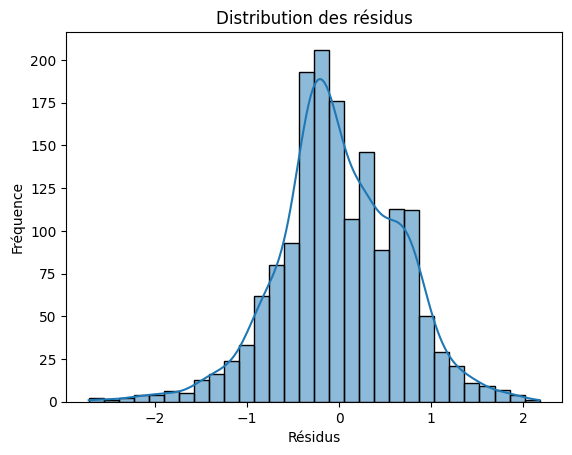

In [37]:
# Récupérer les résidus
residuals = model.resid
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.title("Distribution des résidus")
plt.show()

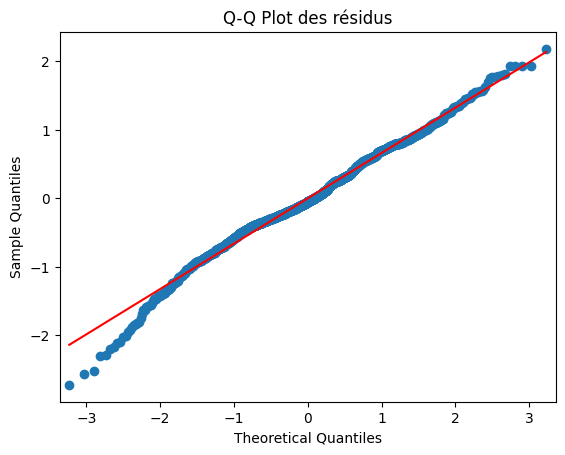

In [35]:
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot des résidus")
plt.show()

### Auto-correlation des résidus

Il y a dans le .summary() du modèle une valeur qui s'appelle Durbin-Watson qui permet de vérifier l'autocorrélation des résidus.Ici on à une valeur de 1.698 qui est proche de 2 ce qui signifie qu'il n'y a pas d'autocorrélation dans les résidus.